In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/short/practicals-main/DL1

/content/drive/MyDrive/Colab Notebooks/short/practicals-main/DL1


In [87]:
import pandas as pd

In [88]:
df = pd.read_csv('HousingData.csv')

In [89]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [90]:
df.dropna(inplace=True)

In [92]:
df_x = df.drop(['MEDV'],axis=1)

In [93]:
df_y = df['MEDV']

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.3,random_state=123)

In [96]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train-mean)/std
x_test = (x_test - mean)/std

In [97]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [98]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer = 'adam',
    loss='mse',
    metrics=['mae']
    )


In [99]:
history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    validation_data=(x_test,y_test)
                  )

Epoch 1/100
9/9 [==============================] - 1s 23ms/step - loss: 543.5004 - mae: 21.4531 - val_loss: 527.7125 - val_mae: 21.1275
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 485.3178 - mae: 20.0751 - val_loss: 463.8530 - val_mae: 19.5355
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 419.8017 - mae: 18.3868 - val_loss: 386.0240 - val_mae: 17.4968
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 340.9355 - mae: 16.3006 - val_loss: 295.1775 - val_mae: 14.9363
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 249.7154 - mae: 13.7431 - val_loss: 201.7318 - val_mae: 11.9506
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 164.8372 - mae: 10.7685 - val_loss: 121.3722 - val_mae: 8.8961
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 95.4827 - mae: 7.9962 - val_loss: 78.2971 - val_mae: 6.8849
Epoch 8/100
9/9 [==============================] - 0s 8ms/s

<Axes: title={'center': 'Loss curves'}, xlabel='Epochs', ylabel='loss'>

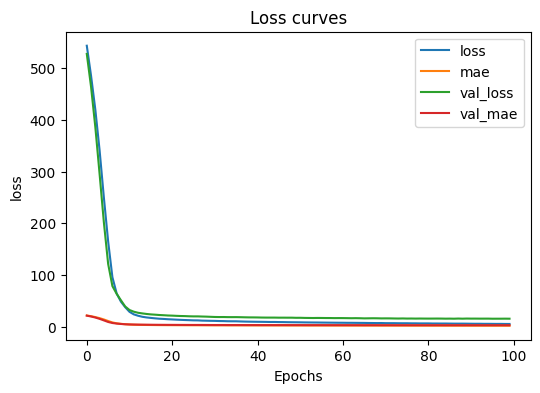

In [106]:
pd.DataFrame(history.history).plot(figsize=(6,4),xlabel="Epochs",ylabel="loss", title='Loss curves')

In [101]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 2ms/step


In [107]:
df_output = pd.DataFrame()
df_output['y_test'] = y_test
df_output['y_pred'] = y_pred
df_output.head()

,y_test,y_pred
282,46.000000,38.241741
317,19.799999,15.508954
166,50.000000,44.691048
182,37.900002,35.067646
494,24.500000,20.918468


In [108]:
from sklearn import metrics
metrics.explained_variance_score(y_test,y_pred)

0.8164455890655518